In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [36]:
data = pd.read_csv('data/summary_real.csv', index_col=0)

In [37]:
def scatter(lm, X_test, y_test,threshold = 0.1):
    plt.axis([0, 1, 0, 1])
    plt.plot([0, 1], [0, 1], 'k--')
    y_pred = lm.predict(X_test)
    for i in range(len(y_pred)):
        if abs(y_pred[i] - y_test[i]) > threshold:
            plt.scatter(y_test[i], y_pred[i], c='r', s=50)
        else:
            plt.scatter(y_test[i], y_pred[i], c='g', s=50)
    plt.xlabel("Y Test")
    plt.ylabel("Predicted Y")
    plt.show()


Regression for SVM_leaved_out


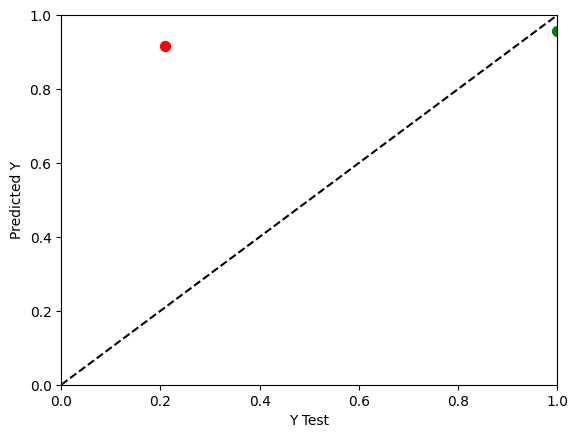

MAE: 0.5777052204111028
MSE: 0.4387214232891544
RMSE: 0.6623604934543986



Regression for SVM_mean


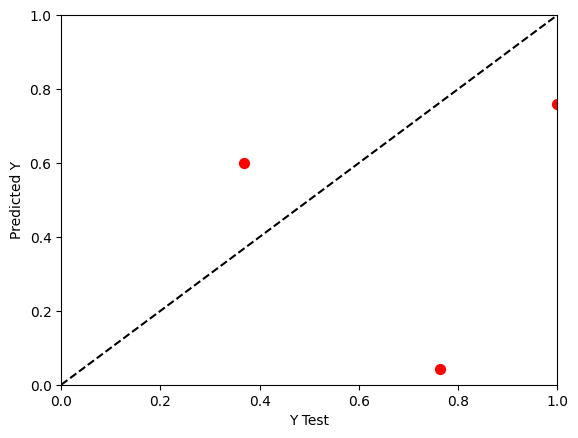

MAE: 0.4697549963904517
MSE: 0.2755183672894296
RMSE: 0.5248984352133559



Regression for CNN_leaved_out


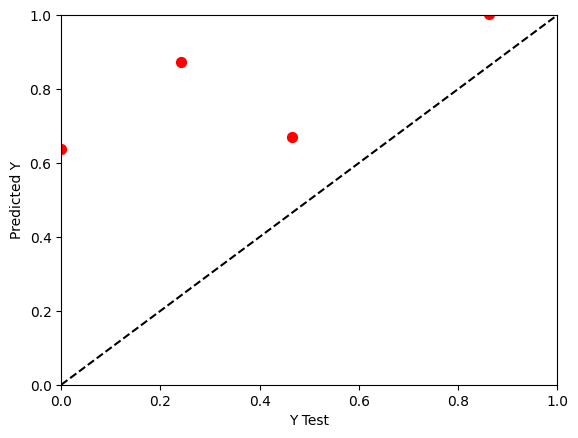

MAE: 0.4033058597957933
MSE: 0.2165574300106904
RMSE: 0.46535731434102373



Regression for CNN_mean


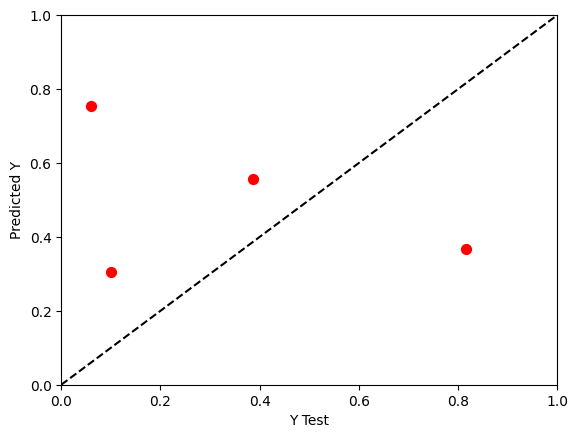

MAE: 0.37920709844537137
MSE: 0.18856932725748826
RMSE: 0.43424569918133704





In [38]:
columns = list(data.columns[:-4])
labels = list(data.columns[-4:])

X = data[columns]

# Normalize the data.
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)



for label in labels:
    print(f"Regression for {label}")
    y = data[label].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    scaler.fit(y)
    y = scaler.transform(y)
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Create linear regression object
    lm = LinearRegression()
    # Train the model using the training sets
    lm.fit(X_train,y_train)
    # Show predictions
    scatter(lm, X_test, y_test)
    # Show error metrics
    predictions = lm.predict(X_test)
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print("")
    print("")
    print("")

[Conclusion] No Sufficient regression model could be trained, becuase the lack of correlation between the features and labels, and the size of the dataset.